In [4]:
import tensorflow as tf 
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#imgs.shape

#(10,784) -> (2,5,28,28) -> (2,28,5,28) ->(2*28,5*28)

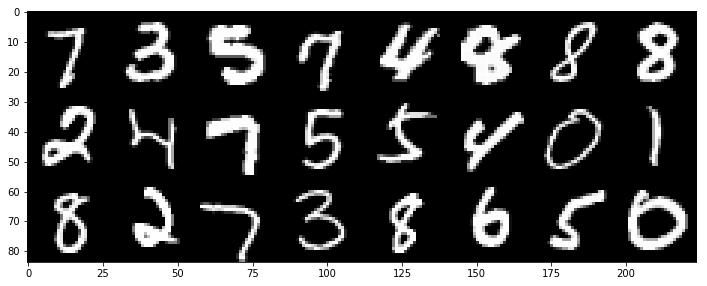

In [8]:
ny = 3 
nx = 8

width = height = 28
imgs, lables = mnist.train.next_batch(24)
imgs = imgs.reshape(ny, nx, height, width).transpose(0,2,1,3).reshape(ny*height, nx*width)

plt.figure(figsize=(12,12))

plt.imshow(imgs, cmap='gray')

In [9]:
np.argmax(lables, axis = -1)

array([7, 3, 5, 7, 4, 8, 8, 8, 2, 4, 7, 5, 5, 4, 0, 1, 8, 2, 7, 3, 8, 6,
       5, 0])

In [10]:
import functools
from operator import mul
def tensor_size(tensor):
    return functools.reduce(mul, (d.value for d in tensor .get_shape()),1)

In [58]:
tf.reset_default_graph()
input = tf.placeholder(tf.float32, [None, 784], name='input')
target = tf.placeholder(tf.float32, [None, 10], name='target')

W = tf.Variable(tf.zeros([784,10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')

y = tf.matmul(input,W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=y))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train_step = optimizer.minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,-1), tf.argmax(target, -1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [59]:
a = tf.constant(1, dtype = tf.float32)
b = tf.constant(2, dtype = tf.float32)
c = a + b

In [60]:
cross_entropy

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [81]:
def get_all_variables(sess):
    all_vars = tf.trainable_variables()
    variable_dict = {}
    sum = 0
    for var in all_vars:
        #print(var.name)
        tensor_size(var)
        _tensor_size = tensor_size(var)
        sum = sum + _tensor_size
        variable_dict[var.name] = sess.run(var.name)
        print('{} {} {}'.format(var.name, var.get_shape(), _tensor_size))
    print('total parameters =', sum)
    return variable_dict

In [101]:
def train(num_iterations):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for i in range(num_iterations):
            batch_x, batch_y = mnist.train.next_batch(50)
            sess.run(train_step, feed_dict={input: batch_x, target: batch_y})

            if i % (num_iterations//10)== 0 :
                _accuracy = sess.run(accuracy, feed_dict = {input: mnist.test.images, target: mnist.test.labels})
                print('iter=%5.5d, accuracy=%lf'  %(i,_accuracy))

        variables = get_all_variables(sess)
    return variables

In [102]:
variables = train(1000)

iter=00000, accuracy=0.194300
iter=00100, accuracy=0.880600
iter=00200, accuracy=0.901600
iter=00300, accuracy=0.902100
iter=00400, accuracy=0.867700
iter=00500, accuracy=0.904600
iter=00600, accuracy=0.909400
iter=00700, accuracy=0.918000
iter=00800, accuracy=0.908700
iter=00900, accuracy=0.907700
fully_connected/weights:0 (784, 10) 7840
fully_connected/biases:0 (10,) 10
total parameters = 7850


In [88]:
variables['W:0'].shape

(784, 10)

In [89]:
variables['b:0'].shape

(10,)

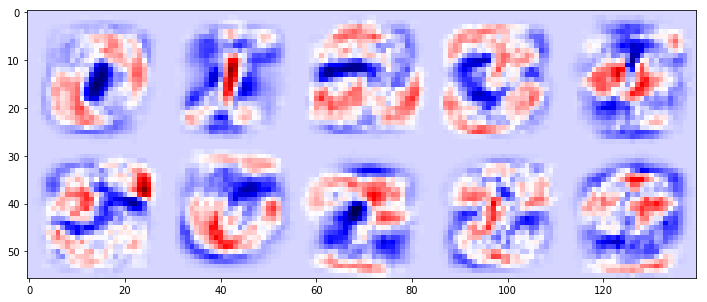

In [90]:
ny = 2
nx = 5
width = height = 28

_W = variables['W:0']

_W = _W.reshape(height, width, ny, nx).transpose(2,0,3,1).reshape(ny*height, nx*width)

plt.figure(figsize=(12,12))

plt.imshow(_W, cmap='seismic')

In [104]:
tf.reset_default_graph()
input = tf.placeholder(tf.float32, [None, 784], name='input')
target = tf.placeholder(tf.float32, [None, 10], name='target')

y = tf.contrib.layers.fully_connected(input, 10, activation_fn=None)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=y))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train_step = optimizer.minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,-1), tf.argmax(target, -1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [103]:
variables = train(10000)

iter=00000, accuracy=0.217100
iter=01000, accuracy=0.906700
iter=02000, accuracy=0.915200
iter=03000, accuracy=0.921000
iter=04000, accuracy=0.923600
iter=05000, accuracy=0.918500
iter=06000, accuracy=0.919900
iter=07000, accuracy=0.921000
iter=08000, accuracy=0.920900
iter=09000, accuracy=0.915800
fully_connected/weights:0 (784, 10) 7840
fully_connected/biases:0 (10,) 10
total parameters = 7850


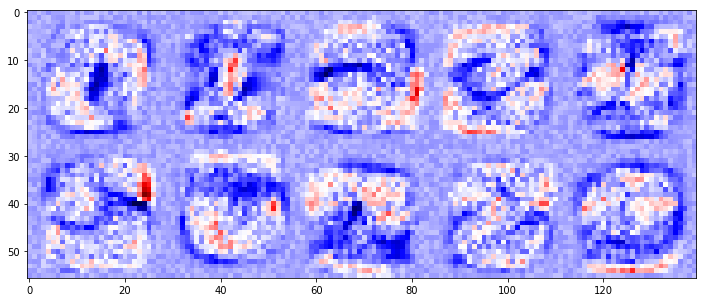

In [105]:
ny = 2
nx = 5
width = height = 28

_W = variables['fully_connected/weights:0']

_W = _W.reshape(height, width, ny, nx).transpose(2,0,3,1).reshape(ny*height, nx*width)

plt.figure(figsize=(12,12))

plt.imshow(_W, cmap='seismic')

In [124]:
tf.reset_default_graph()
input = tf.placeholder(tf.float32, [None, 784], name='input')
target = tf.placeholder(tf.float32, [None, 10], name='target')

h = tf.contrib.layers.fully_connected(input,140, activation_fn=tf.nn.relu) #
h = tf.contrib.layers.fully_connected(h, 30, activation_fn=tf.nn.relu) #
y = tf.contrib.layers.fully_connected(h, 10, activation_fn=None) #


cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target, logits=y))

optimizer = tf.train.GradientDescentOptimizer(0.15)
#optimizer = tf.train.GradientDescentOptimizer(0.33) 97%
#AdamOptimizer

train_step = optimizer.minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,-1), tf.argmax(target, -1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [123]:
variables = train(10000)
# 98.5

iter=00000, accuracy=0.161900
iter=01000, accuracy=0.953300
iter=02000, accuracy=0.966500
iter=03000, accuracy=0.972100
iter=04000, accuracy=0.972700
iter=05000, accuracy=0.970400
iter=06000, accuracy=0.975800
iter=07000, accuracy=0.977500
iter=08000, accuracy=0.976600
iter=09000, accuracy=0.970900
fully_connected/weights:0 (784, 140) 109760
fully_connected/biases:0 (140,) 140
fully_connected_1/weights:0 (140, 30) 4200
fully_connected_1/biases:0 (30,) 30
fully_connected_2/weights:0 (30, 10) 300
fully_connected_2/biases:0 (10,) 10
total parameters = 114440


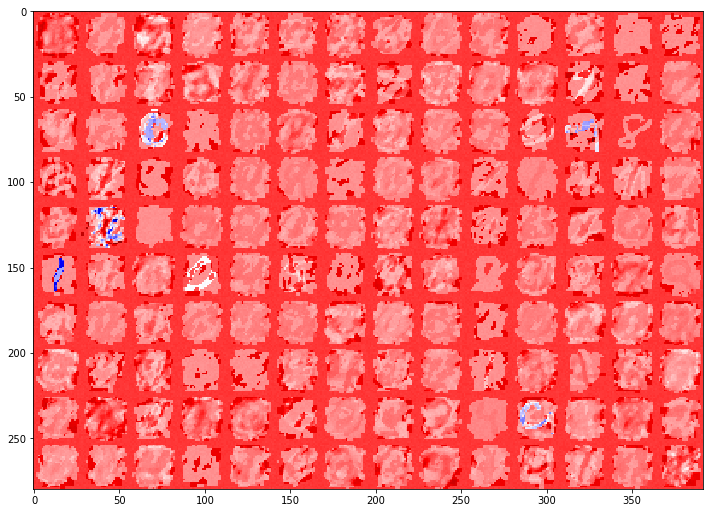

In [121]:
ny = 10
nx = 14
width = height = 28

_W = variables['fully_connected/weights:0']

_W = _W.reshape(height, width, ny, nx).transpose(2,0,3,1).reshape(ny*height, nx*width)

plt.figure(figsize=(12,12))

plt.imshow(_W, cmap='seismic')